In [1]:
#import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']= (12,8)

#Read in data

df = pd.read_csv('C:\movies.csv')

In [35]:
# Let's look at the data 

df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country       budget  \
5445       James Cameron    Sam Worthington  United States  237000000.0   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000.0   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   

             gross                company  runtime  
5445  2.847246e+09  Twentieth Century Fox    162.0  
7445  2.797501e+09         Marvel Studios    181.0  
3045  2.201647e+09  Twentieth Century Fox    194.0  
6663  2.069522e+09              Lucasfilm    138.0  
7244  2.048360e+09         Marvel Studios    149.0

In [3]:
# Find out any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# look at datatypes for our columns 

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [20]:
# for changing data type

df["budget"] = df["budget"].convert_dtypes("int64")

df["gross"] = df["gross"].convert_dtypes("int64")

In [53]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes  director  writer  \
5445  December 18, 2009 (United States)    7.8  1100000.0      1155    1778   
7445     April 26, 2019 (United States)    8.4   903000.0       162     743   
3045  December 19, 1997 (United States)    7.8  1100000.0      1155    1778   
6663  December 18, 2015 (United States)    7.8   876000.0      1125    2550   
7244     April 27, 2018 (United States)    8.4   897000.0       162     743   

      star  country       budget         gross  company  runtime  
5445  2334       55  237000000.0  2.847246e+09     2253    162.0  
7445  2241       55  356000000.0  2.797501e+09     1606    181.0  
3045  1595       55  200000000.0  2.201647e+09     2253    194.0  
6663   524       55  245000000.0  2.069522e+09     1540    138.0  
7244  2241       55  321000000.0  2.048360e+09     1606    149.0

In [54]:
# adding new column

df["YearCorrect"] = df["released"].convert_dtypes(str).str[8:]

df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes  director  writer  \
5445  December 18, 2009 (United States)    7.8  1100000.0      1155    1778   
7445     April 26, 2019 (United States)    8.4   903000.0       162     743   
3045  December 19, 1997 (United States)    7.8  1100000.0      1155    1778   
6663  December 18, 2015 (United States)    7.8   876000.0      1125    2550   
7244     April 27, 2018 (United States)    8.4   897000.0       162     743   

      star  country       budget         gross  company  runtime  \
5445  2334       55  237000000.0  2.847246e+09     2253    162.0   
7445  2241       55  356000000.0  2.797501e+09     1606    181.0   
3045  1595       55  200000000.0  2.201647e+09     2253    194.0   
6663   524       55  245000000.0  2.069522e+09     1540    138.0   
7244  2241       55  321000000.0  2.048360e+09     1606    149.0   

                    YearCorrect  
5445   18, 2009 (United States)  
7445     , 2019 (United States)  
3045   19, 1997 (United States)  
6663   18, 2015 (United States)  
7244     , 2018 (United States)

In [10]:

# Order by gross revenue

df = df.sort_values(by=["gross"], inplace=False, ascending=False)

In [55]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes  director  writer  \
5445  December 18, 2009 (United States)    7.8  1100000.0      1155    1778   
7445     April 26, 2019 (United States)    8.4   903000.0       162     743   
3045  December 19, 1997 (United States)    7.8  1100000.0      1155    1778   
6663  December 18, 2015 (United States)    7.8   876000.0      1125    2550   
7244     April 27, 2018 (United States)    8.4   897000.0       162     743   

      star  country       budget         gross  company  runtime  \
5445  2334       55  237000000.0  2.847246e+09     2253    162.0   
7445  2241       55  356000000.0  2.797501e+09     1606    181.0   
3045  1595       55  200000000.0  2.201647e+09     2253    194.0   
6663   524       55  245000000.0  2.069522e+09     1540    138.0   
7244  2241       55  321000000.0  2.048360e+09     1606    149.0   

                    YearCorrect  
5445   18, 2009 (United States)  
7445     , 2019 (United States)  
3045   19, 1997 (United States)  
6663   18, 2015 (United States)  
7244     , 2018 (United States)

In [37]:
#For scrolling (upper data) 

pd.set_option('display.max_rows', None)

In [40]:
# find out any duplicates

df.drop_duplicates()

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
16                                                 Fame          R      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
19                                           Stir Crazy          R     Comedy   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
24                                         Urban Cowboy         PG      Drama   
25                                       Altered States          R     Horror   
26                                      Little Darlings          R     Comedy   
27                                    Raise the Titanic         PG     Action   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
30                                         My Bodyguard         PG     Comedy   
31                                           Prom Night          R     Horror   
32                             Smokey and the Bandit II         PG     Action   
33                     Cattle Annie and Little Britches         PG      Drama   
34                                 Seems Like Old Times         PG     Comedy   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
38                                      The Jazz Singer         PG      Drama   
39                                Coal Miner's Daughter         PG  Biography   
40                             The Watcher in the Woods         PG     Family   
41                                       Breaker Morant         PG      Drama   
42                                        The Stunt Man          R     Action   
43                               Where the Buffalo Roam          R  Biography   
44                                        The Awakening          R     Horror   
45                        Cheech and Chong's Next Movie          R     Comedy   
46                                           The Island          R     Action   
47                                       The Boogey Man          R     Horror   
48                                        The Nude Bomb         PG     Action   
4

In [7]:
# Budget high correlation
# company high correlation

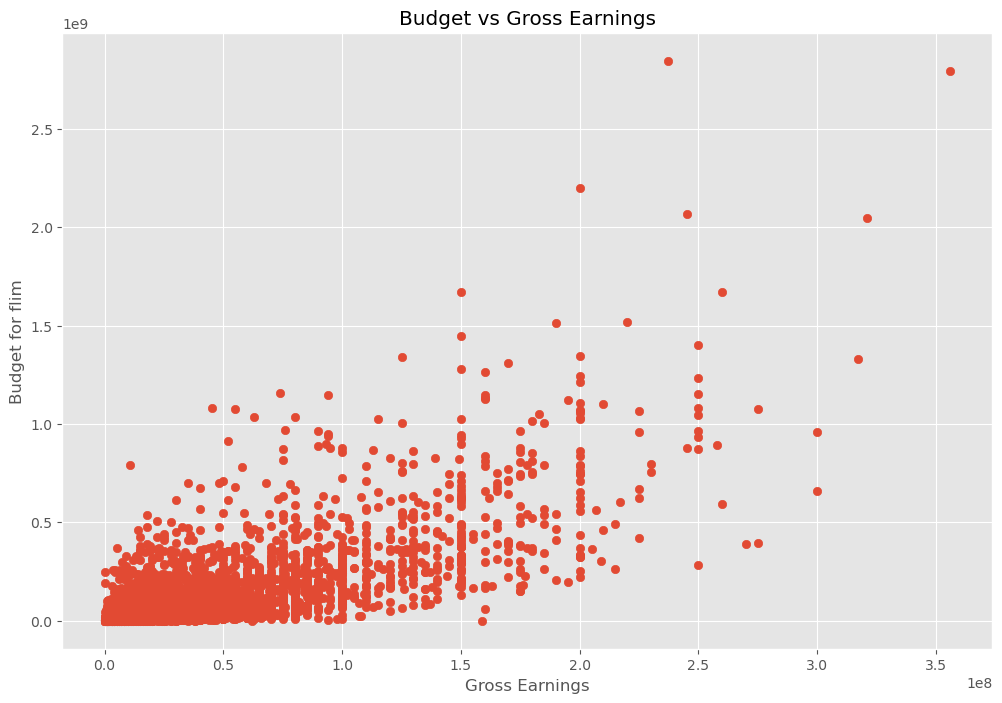

In [14]:
#Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for flim')

plt.show()

In [12]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country       budget  \
5445       James Cameron    Sam Worthington  United States  237000000.0   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000.0   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   

             gross                company  runtime  
5445  2.847246e+09  Twentieth Century Fox    162.0  
7445  2.797501e+09         Marvel Studios    181.0  
3045  2.201647e+09  Twentieth Century Fox    194.0  
6663  2.069522e+09              Lucasfilm    138.0  
7244  2.048360e+09         Marvel Studios    149.0

<AxesSubplot:xlabel='budget', ylabel='gross'>

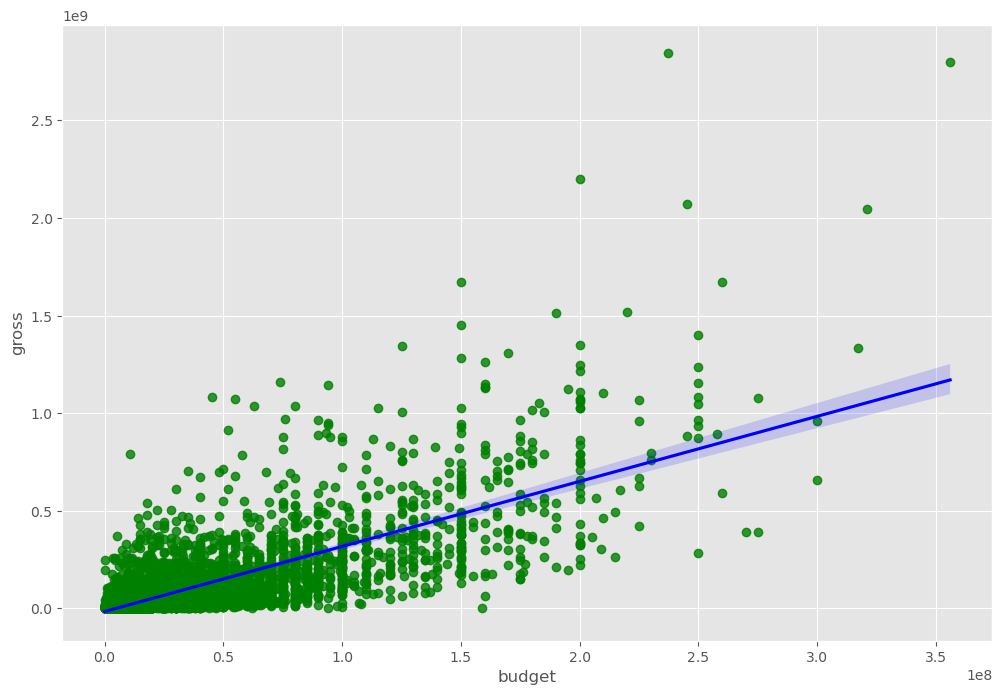

In [16]:
# Plot the Budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"green"}, line_kws={"color":"blue"})

In [17]:
# let's start looking at correlation

In [26]:
df.corr(method='kendall') #Pearson, Kendall, Spearman

year     score     votes    budget     gross   runtime
year     1.000000  0.067652  0.331465  0.224120  0.200618  0.097184
score    0.067652  1.000000  0.300115 -0.000566  0.086046  0.283611
votes    0.331465  0.300115  1.000000  0.353702  0.548899  0.198240
budget   0.224120 -0.000566  0.353702  1.000000  0.512637  0.235483
gross    0.200618  0.086046  0.548899  0.512637  1.000000  0.168933
runtime  0.097184  0.283611  0.198240  0.235483  0.168933  1.000000

In [27]:
df.corr(method='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000

In [29]:
df.corr(method='spearman')

year     score     votes    budget     gross   runtime
year     1.000000  0.099045  0.469829  0.317336  0.293084  0.142977
score    0.099045  1.000000  0.428138 -0.001403  0.126116  0.399857
votes    0.469829  0.428138  1.000000  0.502466  0.742050  0.290159
budget   0.317336 -0.001403  0.502466  1.000000  0.693670  0.336370
gross    0.293084  0.126116  0.742050  0.693670  1.000000  0.246243
runtime  0.142977  0.399857  0.290159  0.336370  0.246243  1.000000

In [30]:
# High Correlation between budget and gross


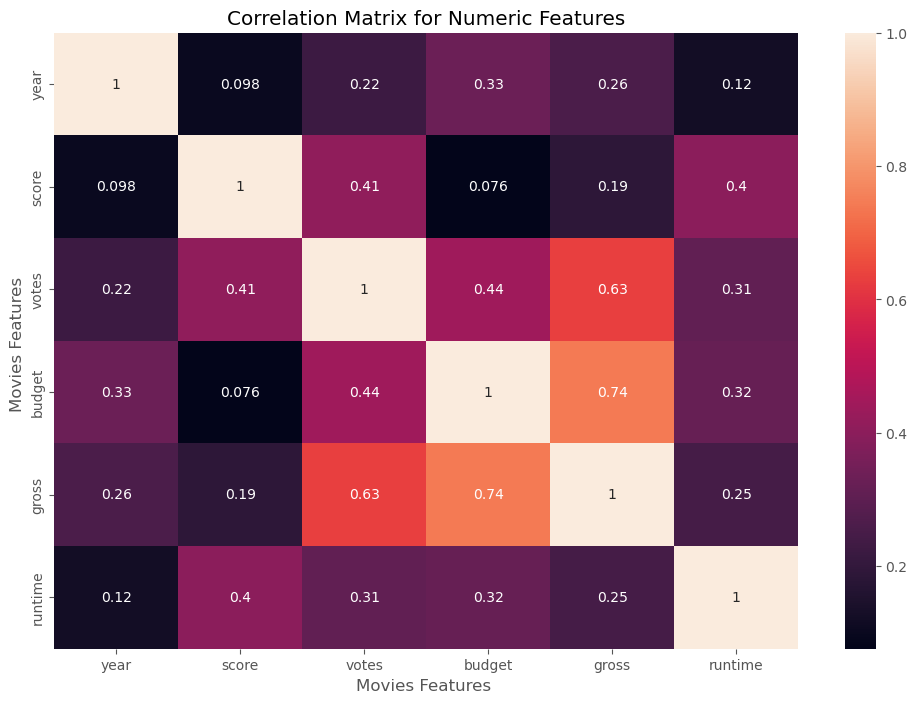

In [33]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movies Features ')
plt.ylabel('Movies Features ')

plt.show()

In [36]:
# Looks at Company

df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country       budget  \
5445       James Cameron    Sam Worthington  United States  237000000.0   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000.0   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   

             gross                company  runtime  
5445  2.847246e+09  Twentieth Century Fox    162.0  
7445  2.797501e+09         Marvel Studios    181.0  
3045  2.201647e+09  Twentieth Century Fox    194.0  
6663  2.069522e+09              Lucasfilm    138.0  
7244  2.048360e+09         Marvel Studios    149.0

In [45]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized   

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   
...                                          ...    ...     ...   ...   
7663                                More to Life   <NA>   Drama  2020   
7664                                 Dream Round   <NA>  Comedy  2020   
7665                               Saving Mbango   <NA>   Drama  2020   
7666                                It's Just Us   <NA>   Drama  2020   
7667                                   Tee em el   <NA>  Horror  2020   

                               released  score      votes  director  writer  \
5445  December 18, 2009 (United States)    7.8  1100000.0      1155    1778   
7445     April 26, 2019 (United States)    8.4   903000.0       162     743   
3045  December 19, 1997 (United States)    7.8  1100000.0      1155    1778   
6663  December 18, 2015 (United States)    7.8   876000.0      1125    2550   
7244     April 27, 2018 (United States)    8.4   897000.0       162     743   
...                                 ...    ...        ...       ...     ...   
7663   October 23, 2020 (United States)    3.1       18.0      1500    2289   
7664   February 7, 2020 (United States)    4.7       36.0       774    2614   
7665          April 27, 2020 (Cameroon)    5.7       29.0      2061    2683   
7666    October 1, 2020 (United States)    NaN        NaN      1184    1824   
7667    August 19, 2020 (United States)    5.7        7.0      2165    3344   

      star  country       budget         gross  company  runtime  
5445  2334       55  237000000.0  2.847246e+09     2253    162.0  
7445  2241       55  356000000.0  2.797501e+09     1606    181.0  
3045  1595       55  200000000.0  2.201647e+09     2253    194.0  
6663   524       55  245000000.0  2.069522e+09     1540    138.0  
7244  2241       55  321000000.0  2.048360e+09     1606    149.0  
...    ...      ...          ...           ...      ...      ...  
7663  2421       55       7000.0           NaN       -1     90.0  
7664  1886       55          NaN           NaN      539     90.0  
7665  2040       55      58750.0           NaN      941      NaN  
7666   450       55      15000.0           NaN       -1    120.0  
7667  2463       44          NaN           NaN     1787    102.0  

[7668 rows x 15 columns]

In [46]:
df

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   
...                                          ...    ...     ...   ...   
7663                                More to Life   <NA>   Drama  2020   
7664                                 Dream Round   <NA>  Comedy  2020   
7665                               Saving Mbango   <NA>   Drama  2020   
7666                                It's Just Us   <NA>   Drama  2020   
7667                                   Tee em el   <NA>  Horror  2020   

                               released  score      votes  director  writer  \
5445  December 18, 2009 (United States)    7.8  1100000.0      1155    1778   
7445     April 26, 2019 (United States)    8.4   903000.0       162     743   
3045  December 19, 1997 (United States)    7.8  1100000.0      1155    1778   
6663  December 18, 2015 (United States)    7.8   876000.0      1125    2550   
7244     April 27, 2018 (United States)    8.4   897000.0       162     743   
...                                 ...    ...        ...       ...     ...   
7663   October 23, 2020 (United States)    3.1       18.0      1500    2289   
7664   February 7, 2020 (United States)    4.7       36.0       774    2614   
7665          April 27, 2020 (Cameroon)    5.7       29.0      2061    2683   
7666    October 1, 2020 (United States)    NaN        NaN      1184    1824   
7667    August 19, 2020 (United States)    5.7        7.0      2165    3344   

      star  country       budget         gross  company  runtime  
5445  2334       55  237000000.0  2.847246e+09     2253    162.0  
7445  2241       55  356000000.0  2.797501e+09     1606    181.0  
3045  1595       55  200000000.0  2.201647e+09     2253    194.0  
6663   524       55  245000000.0  2.069522e+09     1540    138.0  
7244  2241       55  321000000.0  2.048360e+09     1606    149.0  
...    ...      ...          ...           ...      ...      ...  
7663  2421       55       7000.0           NaN       -1     90.0  
7664  1886       55          NaN           NaN      539     90.0  
7665  2040       55      58750.0           NaN      941      NaN  
7666   450       55      15000.0           NaN       -1    120.0  
7667  2463       44          NaN           NaN     1787    102.0  

[7668 rows x 15 columns]

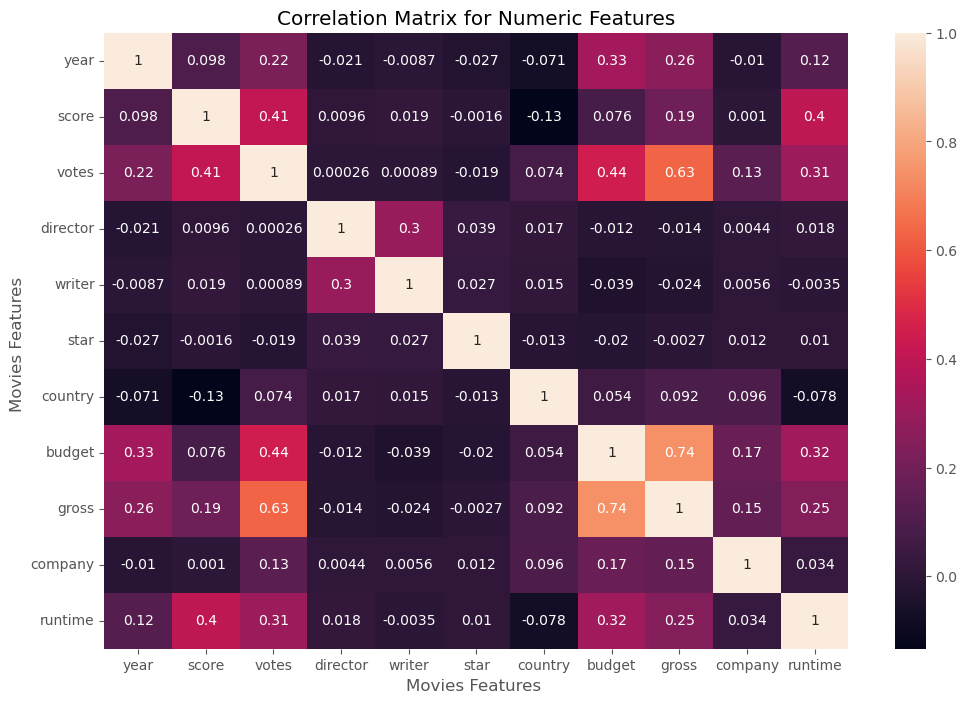

In [47]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movies Features ')
plt.ylabel('Movies Features ')

plt.show()

In [48]:
df_numerized.corr()

year     score     votes  director    writer      star  \
year      1.000000  0.097995  0.222945 -0.020795 -0.008656 -0.027242   
score     0.097995  1.000000  0.409182  0.009559  0.019416 -0.001609   
votes     0.222945  0.409182  1.000000  0.000260  0.000892 -0.019282   
director -0.020795  0.009559  0.000260  1.000000  0.299067  0.039234   
writer   -0.008656  0.019416  0.000892  0.299067  1.000000  0.027245   
star     -0.027242 -0.001609 -0.019282  0.039234  0.027245  1.000000   
country  -0.070938 -0.133348  0.073625  0.017490  0.015343 -0.012998   
budget    0.329321  0.076254  0.442429 -0.012272 -0.039451 -0.019589   
gross     0.257486  0.186258  0.630757 -0.014441 -0.023519 -0.002717   
company  -0.010431  0.001030  0.133204  0.004404  0.005646  0.012442   
runtime   0.120811  0.399451  0.309212  0.017624 -0.003511  0.010174   

           country    budget     gross   company   runtime  
year     -0.070938  0.329321  0.257486 -0.010431  0.120811  
score    -0.133348  0.076254  0.186258  0.001030  0.399451  
votes     0.073625  0.442429  0.630757  0.133204  0.309212  
director  0.017490 -0.012272 -0.014441  0.004404  0.017624  
writer    0.015343 -0.039451 -0.023519  0.005646 -0.003511  
star     -0.012998 -0.019589 -0.002717  0.012442  0.010174  
country   1.000000  0.054063  0.092129  0.095548 -0.078412  
budget    0.054063  1.000000  0.740395  0.173214  0.320447  
gross     0.092129  0.740395  1.000000  0.154840  0.245216  
company   0.095548  0.173214  0.154840  1.000000  0.034402  
runtime  -0.078412  0.320447  0.245216  0.034402  1.000000

In [49]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

year     year        1.000000
         score       0.097995
         votes       0.222945
         director   -0.020795
         writer     -0.008656
                       ...   
runtime  country    -0.078412
         budget      0.320447
         gross       0.245216
         company     0.034402
         runtime     1.000000
Length: 121, dtype: float64

In [50]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

country   score      -0.133348
score     country    -0.133348
country   runtime    -0.078412
runtime   country    -0.078412
country   year       -0.070938
                        ...   
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
company   company     1.000000
runtime   runtime     1.000000
Length: 121, dtype: float64

In [51]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.630757
votes     gross       0.630757
gross     budget      0.740395
budget    gross       0.740395
year      year        1.000000
star      star        1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [52]:
# Votes and budget have the highest correlation to gross earnings

#Company has Low Correlation
